In [1]:
from util.de_utils import *
from util.class_def.de_obj_classes import *
from util.plot_utils import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Load data
* RNAseq data with TMM normalization
* Metadata
* DE data
    * PE specific changes over time in preg

In [2]:
de_PE_mild = de_data("out/de/w_mild_severe/DE_PEspecific_GA_PP_mild_changes_timeToPE_w_covar_bmi_fsex_w_batch.csv", alpha = 0.05, de_type = 'PE preg changes', to_round = False)
de_PE_severe = de_data("out/de/w_mild_severe/DE_PEspecific_GA_PP_severe_changes_timeToPE_w_covar_bmi_fsex_w_batch.csv", alpha = 0.05, de_type = 'PE preg changes', to_round = False)

#Just fill in de_PE with mild adj-pvals but use intersection of genes between mild and severe
de_PE = de_data("out/de/w_mild_severe/DE_PEspecific_GA_PP_mild_changes_timeToPE_w_covar_bmi_fsex_w_batch.csv", alpha = 0.05, de_type = 'PE preg changes', to_round = False)
de_PE.sig_genes = de_PE_mild.sig_genes.intersection(de_PE_severe.sig_genes) #shape

In [3]:
path_prefix = "../../data/rnaseq_stanford_all/discovery/" 
all_data = rnaseq_and_meta_data(path_prefix + "sample_meta_postQC.csv", 
                                path_prefix + "w_mild_severe/logCPM_postQC_RemovedBatch.csv",  
                                path_prefix + "TMM_postQC.csv",
                                is_logCPM_path_R = True,
                                counts_index_cols = [0]
                               )

In [4]:
val_path_prefix = "../../data/rnaseq_stanford_all/val/" 
val_data = rnaseq_and_meta_data(val_path_prefix + "sample_meta_postQC.csv", 
                                val_path_prefix + "htseq_postQC.csv", 
                                 val_path_prefix + "TMM_postQC.csv"
                               )

In [5]:
gapps = rnaseq_and_meta_data("../../data/gapps/sample_meta_postQC.csv", 
                                 "../../data/gapps/htseq_postQC.csv", 
                                 "../../data/gapps/TMM_postQC.csv",  mL_plasma = 1.0)

# Get logFC and CV for each dataset

In [6]:
#Want enough samples per group for good logFC estimates
min_samples_per_group = 5
terms_to_include_per_cohort = {}
for cohort, df in {'Validation 1' : val_data, 'Validation 2' : gapps}.items():
    n_samples = df.meta.groupby(['term', 'case']).subject.count()
    terms_to_exclude = set(n_samples.loc[n_samples < min_samples_per_group].index.get_level_values('term').to_list())
    terms_to_include_per_cohort[cohort] = list(set(df.meta.term).difference(terms_to_exclude))
    
terms_to_include_per_cohort

{'Validation 1': [2, 3, 4], 'Validation 2': [1, 2]}

In [7]:
discovery_logFC_sig = logFC_data_by_group(de_PE.sig_genes, term_labels, 
                                          CV_cutoff = 0.5, logFC_cutoff = 0.75, group_col = 'term')
discovery_logFC_sig.get_logFC_and_CI_by_group(all_data.rnaseq.logCPM.loc[de_PE.sig_genes], all_data.meta)

Now calculating logFC for <= 12 weeks gestation
Now calculating logFC for 13-20 weeks gestation
Now calculating logFC for >= 23 weeks gestation
Now calculating logFC for Post-partum
Now estimating logFC confidence interval for <= 12 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Now estimating logFC confidence interval for 13-20 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Now estimating logFC confidence interval for >= 23 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Now estimating logFC confidence interval for Post-partum
1000 resampling iterations completed
2000 resampling iterations completed
Identifying when during gestation we observe changes


In [8]:
val_logFC_sig = logFC_data_by_group(de_PE.sig_genes, 
                                    {key: val for key, val in term_labels.items() if key in terms_to_include_per_cohort['Validation 1']}, 
                                    CV_cutoff = 0.5, logFC_cutoff = 0.75, group_col = 'term')
val_logFC_sig.get_logFC_and_CI_by_group(val_data.rnaseq.logCPM.loc[de_PE.sig_genes], val_data.meta)

Now calculating logFC for 13-20 weeks gestation
Now calculating logFC for >= 23 weeks gestation
Now calculating logFC for Post-partum
Now estimating logFC confidence interval for 13-20 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Now estimating logFC confidence interval for >= 23 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Now estimating logFC confidence interval for Post-partum
1000 resampling iterations completed
2000 resampling iterations completed
Identifying when during gestation we observe changes


In [9]:
gapps_logFC_sig = logFC_data_by_group(de_PE.sig_genes, 
                                      {key : val for key, val in term_labels.items() if key in terms_to_include_per_cohort['Validation 2']}, 
                                       CV_cutoff = 0.5, logFC_cutoff = 0.75, group_col = 'term')
gapps_logFC_sig.get_logFC_and_CI_by_group(gapps.rnaseq.logCPM.loc[de_PE.sig_genes], gapps.meta)

Now calculating logFC for <= 12 weeks gestation
Now calculating logFC for 13-20 weeks gestation
Now estimating logFC confidence interval for <= 12 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Now estimating logFC confidence interval for 13-20 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Identifying when during gestation we observe changes


# Compare logFC 

{'13-20 weeks gestation': {'pct_same_sign': 82.0,
  'spearman_corr': SpearmanrResult(correlation=0.6654868875117678, pvalue=7.315342636181267e-71),
  'best_fit_line_coefs': array([ 0.73518917, -0.20588494])},
 'PERMUTED 13-20 weeks gestation': {'pct_same_sign': 53.0,
  'spearman_corr': SpearmanrResult(correlation=0.03718520932854603, pvalue=0.38670677330894987),
  'best_fit_line_coefs': array([0.0065402 , 0.14015924])},
 '>= 23 weeks gestation': {'pct_same_sign': 83.0,
  'spearman_corr': SpearmanrResult(correlation=0.6858933340920946, pvalue=7.524077691733657e-77),
  'best_fit_line_coefs': array([0.9154696 , 0.26256604])},
 'PERMUTED >= 23 weeks gestation': {'pct_same_sign': 53.0,
  'spearman_corr': SpearmanrResult(correlation=-0.00016714199048467024, pvalue=0.9968966992780838),
  'best_fit_line_coefs': array([-0.03180079,  0.28602352])},
 'Post-partum': {'pct_same_sign': 60.0,
  'spearman_corr': SpearmanrResult(correlation=0.34748297705693776, pvalue=6.972304869361951e-17),
  'best_fi

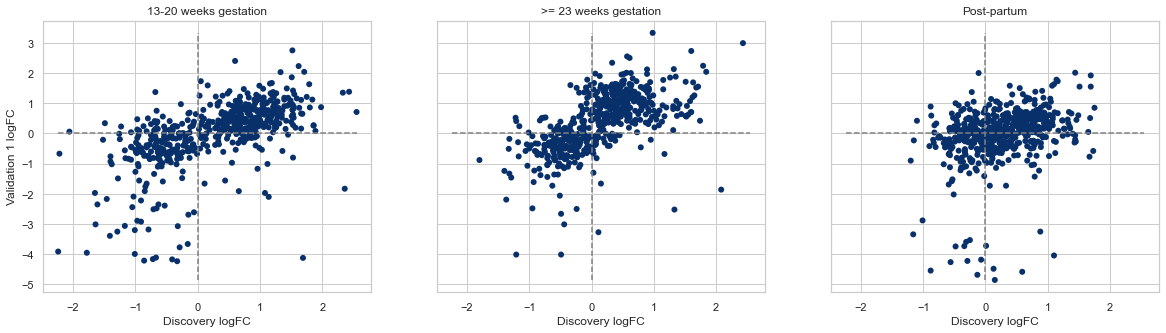

In [10]:
#Fig 2 Main
fig, val_v_disc_comparisons = plot_and_compare_logFC(discovery_logFC_sig.logFC,
                                                     val_logFC_sig.logFC,
                                                     discovery_logFC_sig.CV,
                                                     'Discovery', 'Validation 1',
                                                     labels = term_labels,
                                                     figsize = (20, 5)
                                                    )
save_figure_pdf(fig, 'out/de/viz/compare_disc_val1.pdf')
val_v_disc_comparisons

{'<= 12 weeks gestation': {'pct_same_sign': 92.0,
  'spearman_corr': SpearmanrResult(correlation=0.7062027262992141, pvalue=2.5483345428752467e-83),
  'best_fit_line_coefs': array([0.40564694, 0.02778652])},
 'PERMUTED <= 12 weeks gestation': {'pct_same_sign': 55.00000000000001,
  'spearman_corr': SpearmanrResult(correlation=0.04942364917710968, pvalue=0.24981474100838114),
  'best_fit_line_coefs': array([0.03091875, 0.22360222])},
 '13-20 weeks gestation': {'pct_same_sign': 94.0,
  'spearman_corr': SpearmanrResult(correlation=0.7201055388109769, pvalue=4.4411238660306366e-88),
  'best_fit_line_coefs': array([0.82449996, 0.11762743])},
 'PERMUTED 13-20 weeks gestation': {'pct_same_sign': 55.00000000000001,
  'spearman_corr': SpearmanrResult(correlation=0.0320712694047495, pvalue=0.4553681290057454),
  'best_fit_line_coefs': array([0.03317536, 0.32379783])}}

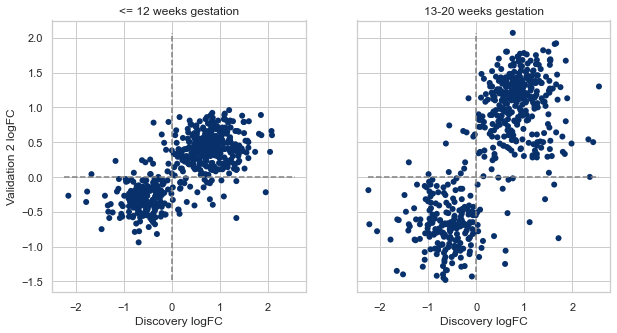

In [11]:
fig, gapps_v_disc_comparisons = plot_and_compare_logFC(discovery_logFC_sig.logFC,
                                                       gapps_logFC_sig.logFC,
                                                       discovery_logFC_sig.CV,
                                                       'Discovery', 'Validation 2',
                                                       labels = term_labels,
                                                       figsize = (10, 5)
                                                      )
save_figure_pdf(fig, 'out/de/viz/compare_disc_val2.pdf')
gapps_v_disc_comparisons